<a href="https://colab.research.google.com/github/drorrusso/ai-learning-playground/blob/main/classification_model_poc/classification_model_poc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### POC Objectives

This poc is a demonstration of two different approaches to use for binary classification of non-sequential data aiming to predict whether a given user will buy or not buy a specific product.

💡 Non-sequential data refers to information that doesn't have a specific order or inherent relationship between its elements.  Here's a breakdown to contrast it with sequential data:

**Non-Sequential Data:**

* Order Doesn't Matter: The order in which you analyze the data points doesn't significantly affect the overall meaning or insights you extract.
* Examples:
    * Customer information in a database (name, age, location) - Knowing someone's age before their name doesn't change the understanding of the data.
    * Image pixels in a photograph - The order you analyze individual pixels doesn't change the overall image.
    * Text documents (excluding narrative text) -  -  In documents like emails, reports, or product descriptions, the order of sentences might not be crucial for understanding the content.

**Sequential Data:**

* Order Matters:  The order of elements is critical to understanding the data and its meaning.
* Examples:
    * Text of a novel or news article - The order of sentences is essential for following the story or understanding the events chronologically.
    * Time series data (stock prices, sensor readings) - The order of data points captures trends and changes over time.
    * DNA sequences - The order of nucleotides determines the genetic code.

In essence, non-sequential data is like a collection of independent pieces of information, while sequential data has a inherent structure or flow that dictates how you interpret it.

### In this POC, the following methods will be used:
1. The first approach will make a use of logistic refression model based on scikit-learn ML library

2. The second will make use of deep learning network using TensorFlow and Kerras

💡 Here's a breakdown of the differences:

**Scikit-learn Models:**

* Focus: Ease of use, interpretability, and efficiency.
* Examples: Logistic Regression, Support Vector Machines (SVMs), Decision Trees, K-Means clustering.
* Inner Workings:  These algorithms employ various mathematical techniques like linear algebra, probability calculations, and optimization algorithms. They don't involve the complex interconnected layers of artificial neurons that define neural networks.

**Deep Learning Models (TensorFlow):**

* Focus: Modeling complex relationships and achieving high accuracy on large datasets.
* Examples: Convolutional Neural Networks (CNNs) for image recognition, Recurrent Neural Networks (RNNs) for language processing.
* Inner Workings:  Deep learning models are built using artificial neural networks with multiple interconnected layers. These layers process information progressively, learning features from the data and ultimately making predictions.

**Training and Running Models:**

* Training:  Both scikit-learn and TensorFlow models involve training the model on a dataset. This process involves the model learning patterns from the data to make predictions on unseen data.
* Running Models: Once trained, both types of models can be used to make predictions on new data points. They take new data as input and provide an output based on what they learned during training.

### The dataset for this POC
Taken originally from: https://www.kaggle.com/datasets/dragonheir/logistic-regression/data

Located at: https://raw.githubusercontent.com/drorrusso/ai-playground/main/classification_model_poc/Social_Network_Ads.csv

### Logistic refression model based on scikit-learn ML library

In [1]:
## import dataset from google drive with pandas
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/drorrusso/ai-playground/main/classification_model_poc/Social_Network_Ads.csv')
data = df.drop(columns=['User ID'])
#data = pd.get_dummies(data)
data['GenderNumerical'] = df['Gender'].map({'Male': 1, 'Female': 0})
data


,Gender,Age,EstimatedSalary,Purchased,GenderNumerical
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1
...,...,...,...,...,...
395,Female,46,41000,1,0
396,Male,51,23000,1,1
397,Female,50,20000,1,0
398,Male,36,33000,0,1


In [2]:
## check the data
print(data.info())
print(data.describe())
print(data['Purchased'].value_counts())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
 4   GenderNumerical  400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
              Age  EstimatedSalary   Purchased  GenderNumerical
count  400.000000       400.000000  400.000000       400.000000
mean    37.655000     69742.500000    0.357500         0.490000
std     10.482877     34096.960282    0.479864         0.500526
min     18.000000     15000.000000    0.000000         0.000000
25%     29.750000     43000.000000    0.000000         0.000000
50%     37.000000     70000.000000    0.000000         0.000000
75%     46.000000     88000.000000    1.000000         1.000000
max     60.00

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Split the data into features (X) and target variable (y)
# X is Gender, Age, EstimatedSalary columns and y is Purchased
X = data[['GenderNumerical', 'Age', 'EstimatedSalary']]
y = data['Purchased']

# Normalize the data
def normalize_data(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

scaled_data = normalize_data(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)


# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8875


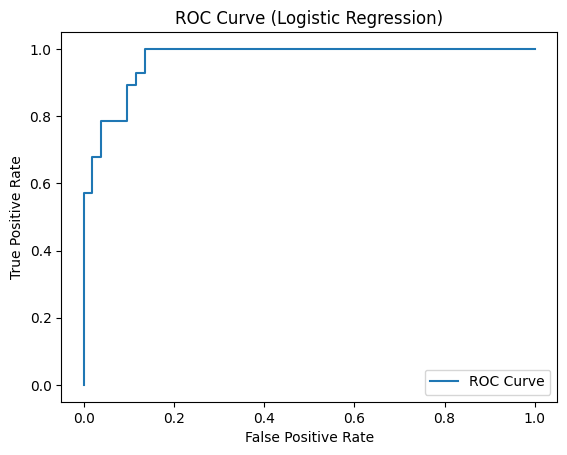

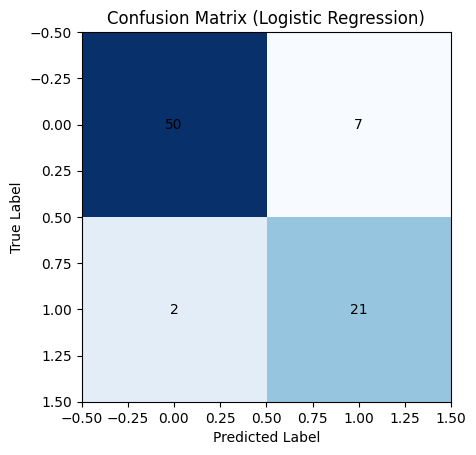

In [4]:
# prompt: plot the above test and prediction
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of positive class

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()
plt.show()

# 3. Confusion Matrix (assuming you have pre-defined labels for the target variable)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Logistic Regression)')
plt.text(0, 0, cm[0, 0], va='center', ha='center')
plt.text(0, 1, cm[0, 1], va='center', ha='center')
plt.text(1, 0, cm[1, 0], va='center', ha='center')
plt.text(1, 1, cm[1, 1], va='center', ha='center')
plt.show()



In [6]:
## run prediction with the following
new_data = [
     [0, 55, 90000],
    [0, 49, 80000],
    [0, 49, 35000]
]

# Create the DataFrame
final_X_test = pd.DataFrame(new_data, columns=X.columns)
final_normalized_data = normalize_data(final_X_test)
final_y_pred = model.predict(final_normalized_data)
print(final_normalized_data)
print(final_y_pred)


[[ 0.          1.41421356  0.90575292]
 [ 0.         -0.70710678  0.48771311]
 [ 0.         -0.70710678 -1.39346603]]
[1 0 0]


### Binary classification network using TensorFlow

In [7]:
import tensorflow as tf

X_tf_train = tf.constant(X_train)
X_tf_test = tf.constant(X_test)
y_tf_train = tf.constant(y_train)
y_tf_test = tf.constant(y_test)

def tensor_info(tensor):
  print(f"Type: {type(tensor)}")
  print(f"Shape: {tensor.shape}")
  print(f"Data type: {tensor.dtype}")
  print(f"Number of elements: {tf.size(tensor)}")
  print(f"Tensor head:\n{tensor[:5]}")

tensor_info(X_tf_train)
tensor_info(X_tf_test)
tensor_info(y_tf_train)
tensor_info(y_tf_test)

Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (320, 3)
Data type: <dtype: 'float64'>
Number of elements: 960
Tensor head:
[[-0.98019606 -1.01769239 -0.37418169]
 [ 1.02020406  0.79705706 -1.22576253]
 [-0.98019606  0.12846516  1.88691227]
 [-0.98019606  0.60603081 -0.9027491 ]
 [-0.98019606  1.84770149 -1.28449224]]
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (80, 3)
Data type: <dtype: 'float64'>
Number of elements: 240
Tensor head:
[[-0.98019606  0.79705706 -1.40195167]
 [-0.98019606  2.03872775  0.53612887]
 [-0.98019606 -0.92217926 -0.75592482]
 [-0.98019606  0.98808332  0.77104772]
 [-0.98019606 -0.82666613 -1.22576253]]
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (320,)
Data type: <dtype: 'int64'>
Number of elements: 320
Tensor head:
[0 1 1 0 1]
Type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (80,)
Data type: <dtype: 'int64'>
Number of elements: 80
Tensor head:
[0 1 0 1 0]


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.015), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_tf_train, y_tf_train, epochs=10, validation_data=(X_tf_test, y_tf_test))


Epoch 1/10
10/10 [==============================] - 8s 273ms/step - loss: 0.7115 - accuracy: 0.6000 - val_loss: 0.5600 - val_accuracy: 0.7875
Epoch 2/10
10/10 [==============================] - 0s 47ms/step - loss: 0.5209 - accuracy: 0.7906 - val_loss: 0.4372 - val_accuracy: 0.8375
Epoch 3/10
10/10 [==============================] - 0s 46ms/step - loss: 0.4472 - accuracy: 0.8188 - val_loss: 0.3649 - val_accuracy: 0.8125
Epoch 4/10
10/10 [==============================] - 0s 40ms/step - loss: 0.3973 - accuracy: 0.8219 - val_loss: 0.3080 - val_accuracy: 0.8250
Epoch 5/10
10/10 [==============================] - 0s 46ms/step - loss: 0.3623 - accuracy: 0.8344 - val_loss: 0.2728 - val_accuracy: 0.8750
Epoch 6/10
10/10 [==============================] - 0s 47ms/step - loss: 0.3401 - accuracy: 0.8500 - val_loss: 0.2452 - val_accuracy: 0.9000
Epoch 7/10
10/10 [==============================] - 0s 47ms/step - loss: 0.3214 - accuracy: 0.8656 - val_loss: 0.2292 - val_accuracy: 0.9125
Epoch 8/10
1

In [10]:

model.evaluate(X_tf_test, y_tf_test)
prediction = model.predict(final_normalized_data)
print(final_normalized_data)
print(tf.math.round(prediction))

1/1 [==============================] - 0s 394ms/step
[[ 0.          1.41421356  0.90575292]
 [ 0.         -0.70710678  0.48771311]
 [ 0.         -0.70710678 -1.39346603]]
tf.Tensor(
[[1.]
 [0.]
 [0.]], shape=(3, 1), dtype=float32)


3/3 [==============================] - 0s 3ms/step


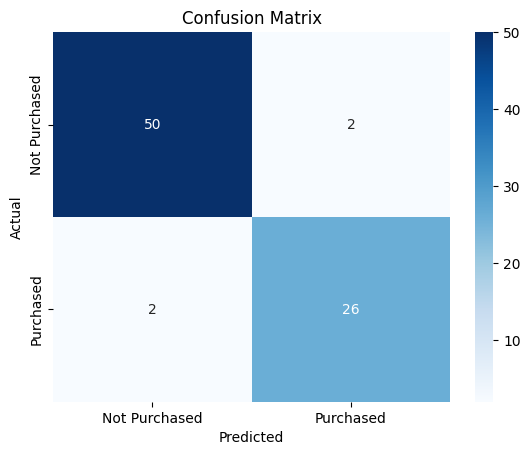

In [11]:
# prompt: plot a confution matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for the test data
y_pred = model.predict(X_test)

# Convert the predictions to binary values (0 or 1)
y_pred_binary = [int(round(p[0])) for p in y_pred]

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])

# Set labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Display the heatmap
plt.show()
